<a href="https://colab.research.google.com/github/nistrate/tensorflow_notes/blob/master/sklearn_breast_cancer_simple_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import scipy

import matplotlib.pyplot as plt

Linear Classification Theory

Recap the ML steps
1) Load in the datat (x , y)
2) Instatiate the model
3) Train ("fit") the model ( model.fit(x,y) )
4) Evaluate our model (accuracy on the train data)

We are going to look at the:

1) Architecture of the model (equation to go rfom input to prediction)
2) How do we train the model
  - cost / loss / error function function
  - gradient descent to minimize the cost

Definition of a line $y = wx+b$ (2D)

$x_1$ is the horizontal axis $x$
$x_2$ is the vertical axis $y$

The equation of a line can be rewritten as:
$$
w_1 x_1 + w_2 x_2 + b = 0
$$

 - How do we clasify?
$$
a = w_1 x_1 + w_2 x_2 + b\\
~~~~~if~ a \ge 0 \rightarrow predict~1\\
~~~~~if~ a < 0 \rightarrow predict~0
$$

**Basic Structure of a tf program**

D = #input size

X_train, y_train = #Data for training
X_test, y_test = #Data for testing

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (D,)),
                                    tf.keras.Dense(1, activation = 'sigmoid')
])
 #Sequential means one after another


**training the model**

 model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])
 
 #optimizer is the algorith like gradient descent, adam is a common one
 #metrics accuracy = #correct / #total

 #fitting

 r = model.fit(X_train, y_train,
               validation_data = (X_test, y_test),
               epochs = 100)
 
 plt.plot(r.history['loss'], label = 'loss') #training
 plt.plot(r.history['val_loss'], label = 'val_loss') #test

In [6]:
# prediction if a patients tumor is malignant or benign

#Load Data

from sklearn.datasets import load_breast_cancer

In [7]:
#load the data
data = load_breast_cancer() 

In [9]:
# check the type of data
type(data)

sklearn.utils.Bunch

In [10]:
# note: this is a bunch object
# this basically acts like a dictionary where you can treat the keys like atributes

data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
# 'data' (the attribute) means the input data
data.data.shape

(569, 30)

In [13]:
# 'targets'
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
data.target.shape

(569,)

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
# normally we would put all of our imports at the top
# but this lets us tell a story

from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size  = 0.33)

N,D = X_train.shape

In [23]:
# Scale the data
# you'll learn why scaling is needed in a later course (the main idea is that you want to normalize everything so it operates in the same numerical range) x = (x-\mu) / sigma
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Now all the TensorFlow stuff
# We start with building a model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (D,)),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Alternatively, we can do:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape = (D,), activation = 'sigmoid))

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Training the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100 )

# Evaluating the model - evaluate() returns loss and accuracy
print ('Train score: ', model.evaluate(X_train, y_train))
print ('Test score: ', model.evaluate(X_test, y_test))

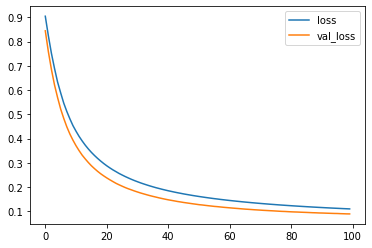

In [27]:
# Plot what's returned by model.fit()

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

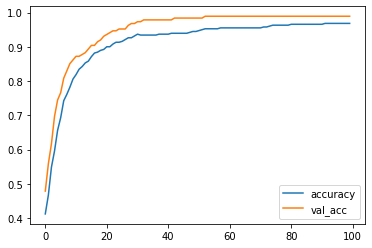

In [28]:
# Plot accuracy

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()